## Bedroom results:

Loaded 5000 images for category 'real'
Loaded 5000 images for category 'gansformer'
Loaded 768 images for category 'ddpm'

RGB Channel Moments by Category:
Category: real
  R: {'mean': 146.5222958303392, 'variance': 4267.573915742878, 'skewness': -0.3444606016964582, 'kurtosis': -0.7720261330314604}
  G: {'mean': 130.69926868521927, 'variance': 4580.242043920208, 'skewness': -0.10249608847918097, 'kurtosis': -0.9591762306464982}
  B: {'mean': 116.4686566467593, 'variance': 5039.422713364461, 'skewness': 0.1349863256294817, 'kurtosis': -1.028714266019294}
Category: gansformer
  R: {'mean': 153.26736029, 'variance': 3073.7289583053266, 'skewness': -0.568941364818394, 'kurtosis': -0.3005552204306836}
  G: {'mean': 139.420373645, 'variance': 3512.8860210035737, 'skewness': -0.35983438978426796, 'kurtosis': -0.6339807772245032}
  B: {'mean': 122.59850469, 'variance': 3967.6790558560647, 'skewness': -0.08769604582231581, 'kurtosis': -0.8424067831509356}
Category: ddpm
  R: {'mean': 139.90571

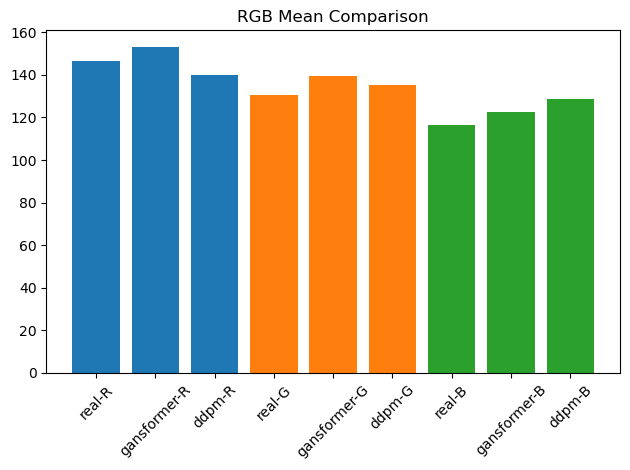

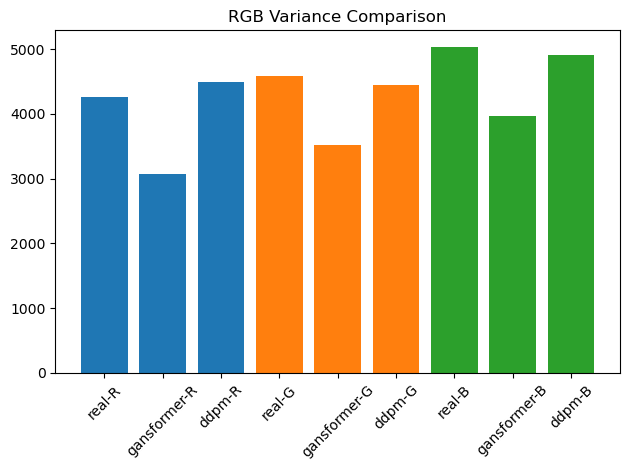

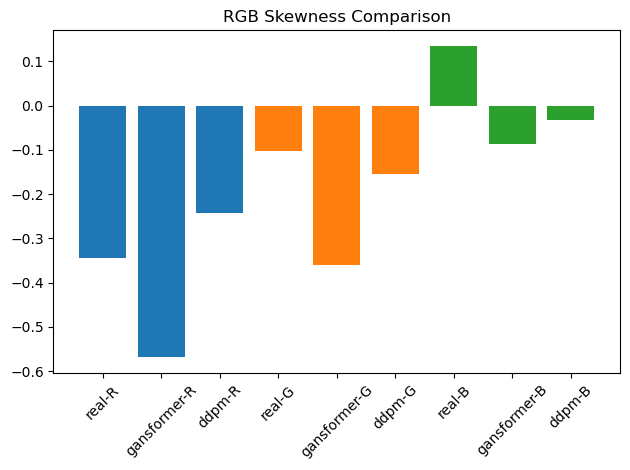

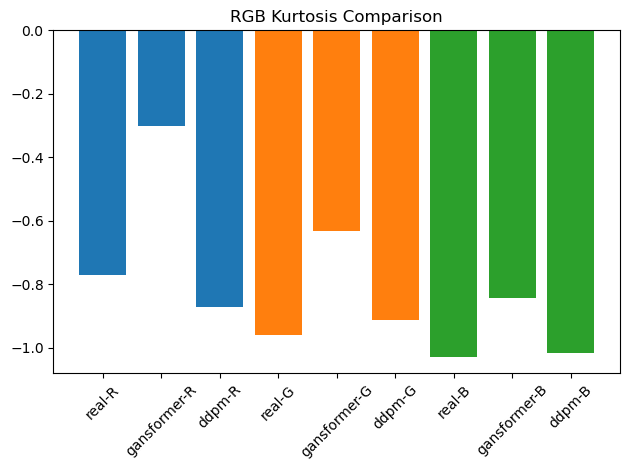

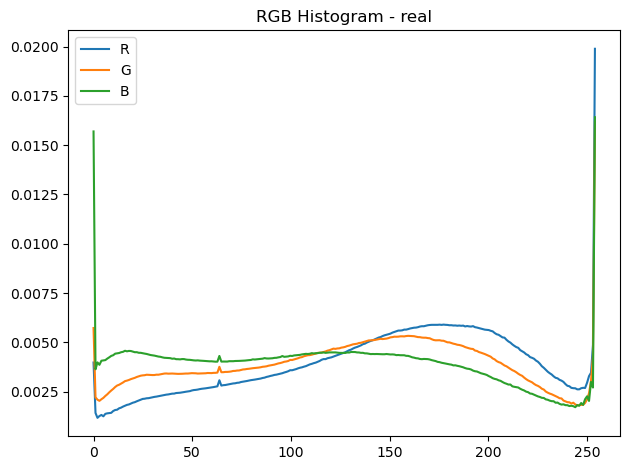

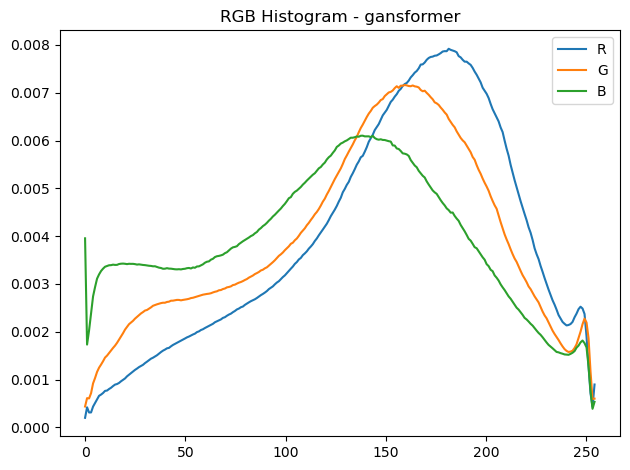

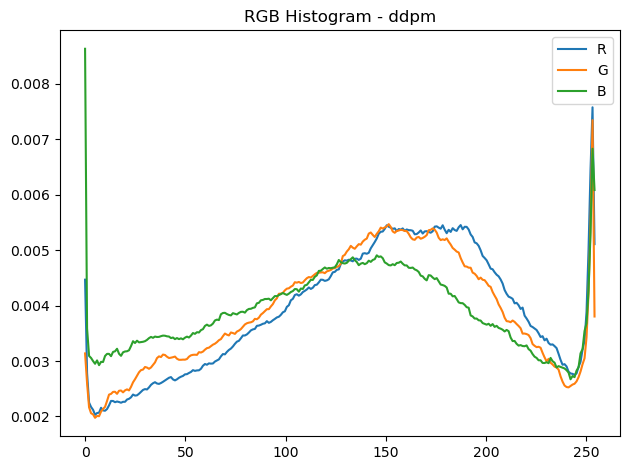


HSV Channel Moments by Category:
Category: real
  H: {'mean': 42.29253656240018, 'variance': 2391.9040315106654, 'skewness': 1.4563848983869894, 'kurtosis': 0.7991207546753407}
  S: {'mean': 77.20042372530203, 'variance': 4593.069861690258, 'skewness': 0.913799671087987, 'kurtosis': -0.1086525425441014}
  V: {'mean': 150.5805606362826, 'variance': 4193.249903446997, 'skewness': -0.3672590288634703, 'kurtosis': -0.7419593128113293}
Category: gansformer
  H: {'mean': 33.047286245, 'variance': 1351.9758428360392, 'skewness': 2.2188751804529394, 'kurtosis': 4.176769918189659}
  S: {'mean': 67.80317055, 'variance': 3300.851580097599, 'skewness': 1.0870758109989165, 'kurtosis': 0.545759172140114}
  V: {'mean': 155.346974025, 'variance': 3099.9153688209562, 'skewness': -0.5605301902766104, 'kurtosis': -0.2897694459443598}
Category: ddpm
  H: {'mean': 58.483920377604164, 'variance': 2443.1220803129354, 'skewness': 0.6358135394704774, 'kurtosis': -0.834155753445387}
  S: {'mean': 71.4224657552

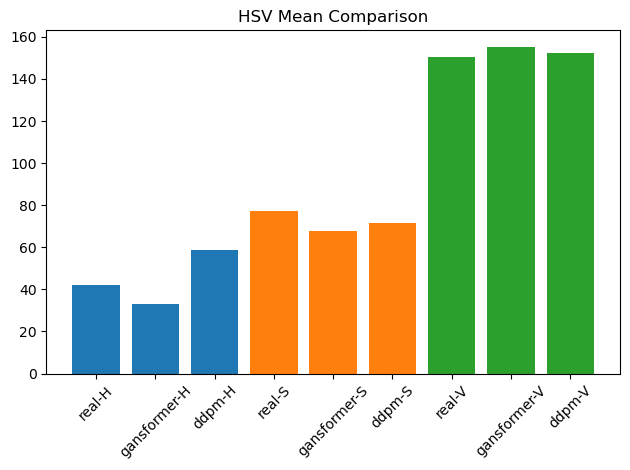

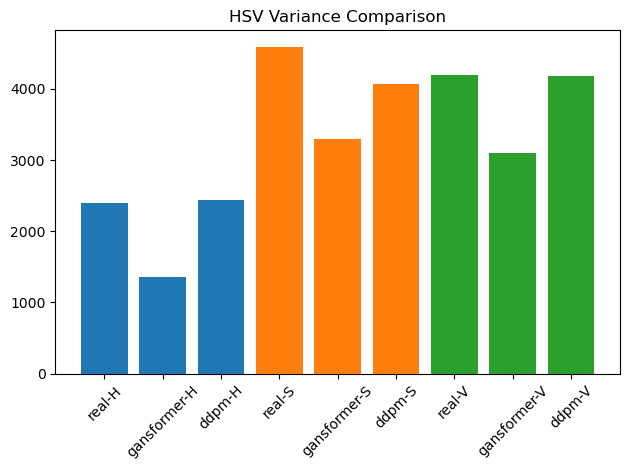

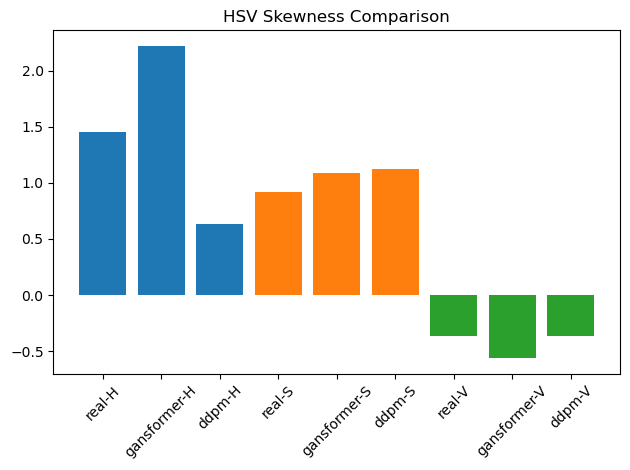

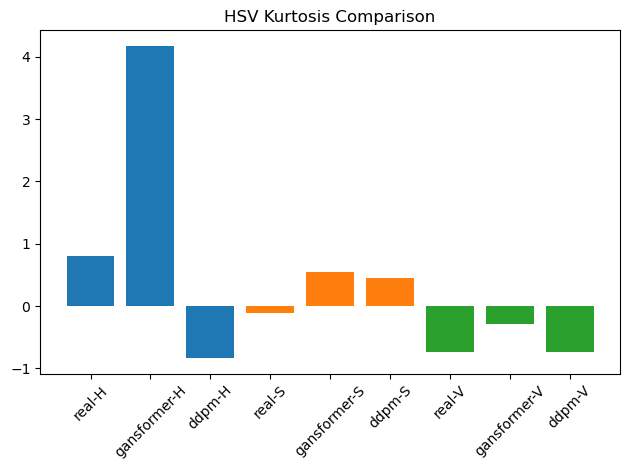


YCbCr Channel Moments by Category:
Category: real
  Y: {'mean': 133.81438339526377, 'variance': 4315.030800701665, 'skewness': -0.12865514676828124, 'kurtosis': -0.9123242857407767}
  Cr: {'mean': 137.08131760934612, 'variance': 203.26417174701865, 'skewness': 0.9453794407778312, 'kurtosis': 4.936365777788218}
  Cb: {'mean': 118.20664733461034, 'variance': 205.55906076372545, 'skewness': -0.752190060767883, 'kurtosis': 2.897253825591859}
Category: gansformer
  Y: {'mean': 141.64549876, 'variance': 3318.2818372308507, 'skewness': -0.3813381401424227, 'kurtosis': -0.5839012944114135}
  Cr: {'mean': 136.301733905, 'variance': 102.20984471557449, 'skewness': 1.0117117192597724, 'kurtosis': 3.494691324499671}
  Cb: {'mean': 117.24582879, 'variance': 116.41003812600775, 'skewness': -0.5831915192400832, 'kurtosis': 1.632866379404894}
Category: ddpm
  Y: {'mean': 136.01291826171874, 'variance': 4234.623791354178, 'skewness': -0.14772276857726377, 'kurtosis': -0.8872187399097529}
  Cr: {'mean'

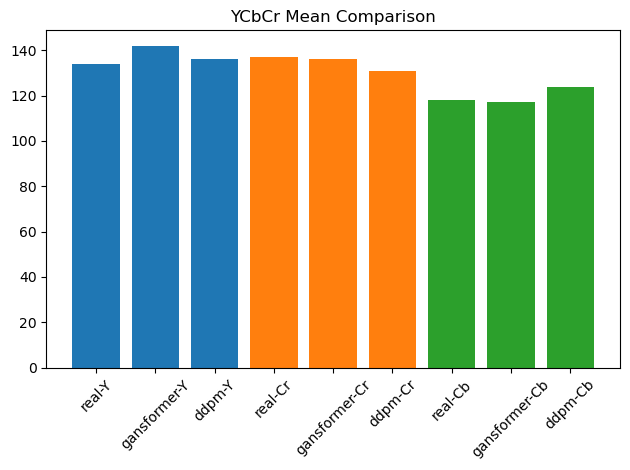

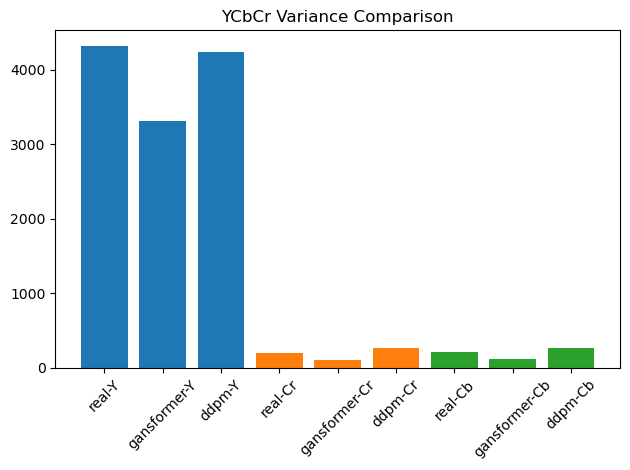

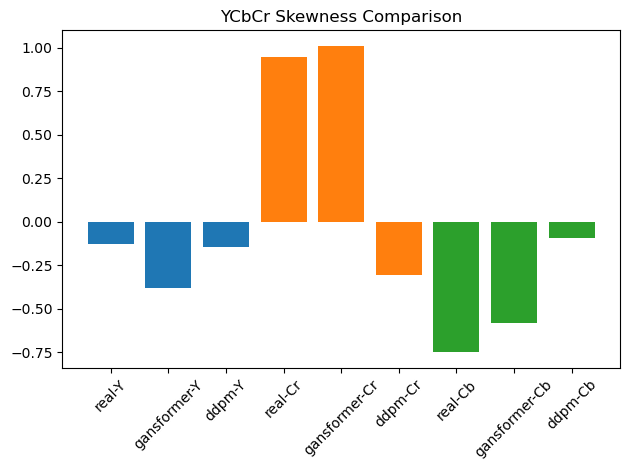

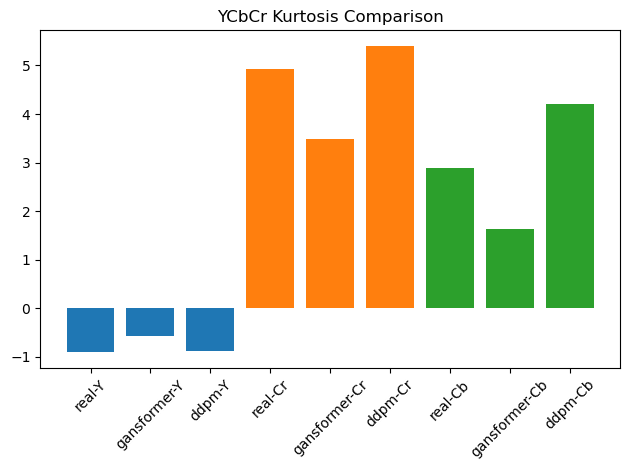

In [9]:
#!/usr/bin/env python3
"""
Color Distribution Analysis for Hierarchical Datasets

This script analyzes color distributions across three main categories
(`real`, `gan`, `diffusion`), each containing many subfolders of images.
It:
  1. Recursively loads all images under each category directory
  2. Computes RGB channel moments (mean, variance, skewness, kurtosis)
  3. Computes normalized RGB histograms
  4. Computes channel moments in HSV and YCbCr spaces
  5. Plots comparative bar charts and histograms across categories

Requirements:
    - Python 3.x
    - numpy
    - scipy
    - matplotlib
    - pillow
    - opencv-python

Usage:
    1. Arrange your data root:
         data/BEST/face/real/
         data/BEST/face/gan/
         data/BEST/face/diffusion/
       Each category folder may contain nested subfolders.
    2. Run:
         python color_distribution_analysis.py
"""
import os
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images_recursive(root_folder, exts=None):
    """
    Recursively walk root_folder and load all images into a list of arrays.
    """
    if exts is None:
        exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    images = []
    for dirpath, _, filenames in os.walk(root_folder):
        for fname in filenames:
            if os.path.splitext(fname.lower())[1] not in exts:
                continue
            path = os.path.join(dirpath, fname)
            try:
                with Image.open(path) as img:
                    images.append(np.array(img.convert('RGB')))
            except Exception as e:
                print(f"Warning: failed to load {path}: {e}")
    return images


def compute_rgb_moments(images):
    pixels = np.concatenate([img.reshape(-1,3) for img in images], axis=0)
    moments = {}
    for i, ch in enumerate(['R','G','B']):
        data = pixels[:, i]
        moments[ch] = {
            'mean': np.mean(data),
            'variance': np.var(data),
            'skewness': skew(data),
            'kurtosis': kurtosis(data)
        }
    return moments


def compute_rgb_histograms(images, bins=256, normalize=True):
    hist_sum = {ch: np.zeros(bins) for ch in ['R','G','B']}
    for img in images:
        for i, ch in enumerate(['R','G','B']):
            h, edges = np.histogram(img[...,i].flatten(), bins=bins, range=(0,255))
            hist_sum[ch] += h
    if normalize:
        total = sum(hist_sum.values())[0] if False else None
        for ch in hist_sum:
            hist_sum[ch] = hist_sum[ch] / hist_sum[ch].sum()
    return hist_sum, edges


def convert_and_compute_moments(images, space='HSV'):
    if space.upper() == 'HSV':
        flag = cv2.COLOR_RGB2HSV
        names = ['H','S','V']
    elif space.upper() == 'YCBCR':
        flag = cv2.COLOR_RGB2YCrCb
        names = ['Y','Cr','Cb']
    else:
        raise ValueError(f"Unknown color space: {space}")
    conv = [cv2.cvtColor(img, flag) for img in images]
    pix = np.concatenate([c.reshape(-1,3) for c in conv], axis=0)
    moments = {}
    for i, name in enumerate(names):
        d = pix[:, i]
        moments[name] = {
            'mean': np.mean(d),
            'variance': np.var(d),
            'skewness': skew(d),
            'kurtosis': kurtosis(d)
        }
    return moments


def plot_comparison(moments_dict, title_prefix, channel_names):
    """Plot bar charts for each statistical moment across categories."""
    categories = list(moments_dict.keys())
    stats = ['mean', 'variance', 'skewness', 'kurtosis']
    for stat in stats:
        plt.figure()
        for ch in channel_names:
            values = [moments_dict[cat][ch][stat] for cat in categories]
            plt.bar([f"{cat}-{ch}" for cat in categories], values)
        plt.xticks(rotation=45)
        plt.title(f"{title_prefix} {stat.capitalize()} Comparison")
        plt.tight_layout()
        plt.show()


def plot_histograms(per_cat_hists, bin_edges):
    """Plot normalized RGB histograms for each category."""
    for cat, hist_sum in per_cat_hists.items():
        plt.figure()
        for ch in ['R','G','B']:
            plt.plot(bin_edges[:-1], hist_sum[ch], label=ch)
        plt.title(f"RGB Histogram - {cat}")
        plt.legend()
        plt.tight_layout()
        plt.show()


def main():
    base_dir = 'data/BEST/bedroom_comparison'
    categories = ['real','gansformer','ddpm']

    # Load images per category
    datasets = {}
    for cat in categories:
        path = os.path.join(base_dir, cat)
        imgs = load_images_recursive(path)
        print(f"Loaded {len(imgs)} images for category '{cat}'")
        datasets[cat] = imgs

    # RGB moments
    rgb_moments = {cat: compute_rgb_moments(imgs) for cat, imgs in datasets.items()}
    print("\nRGB Channel Moments by Category:")
    for cat, mom in rgb_moments.items():
        print(f"Category: {cat}")
        for ch, stats in mom.items(): print(f"  {ch}: {stats}")
    plot_comparison(rgb_moments, "RGB", ['R','G','B'])

    # RGB histograms
    per_cat_hists = {}
    for cat, imgs in datasets.items():
        h, edges = compute_rgb_histograms(imgs)
        per_cat_hists[cat] = h
    plot_histograms(per_cat_hists, edges)

    # HSV and YCbCr moments & plots
    for space, ch_names in [('HSV', ['H','S','V']), ('YCbCr', ['Y','Cr','Cb'])]:
        alt_mom = {cat: convert_and_compute_moments(imgs, space) for cat, imgs in datasets.items()}
        print(f"\n{space} Channel Moments by Category:")
        for cat, mom in alt_mom.items():
            print(f"Category: {cat}")
            for ch, stats in mom.items(): print(f"  {ch}: {stats}")
        plot_comparison(alt_mom, space, ch_names)

if __name__ == '__main__':
    main()
    plt.show()


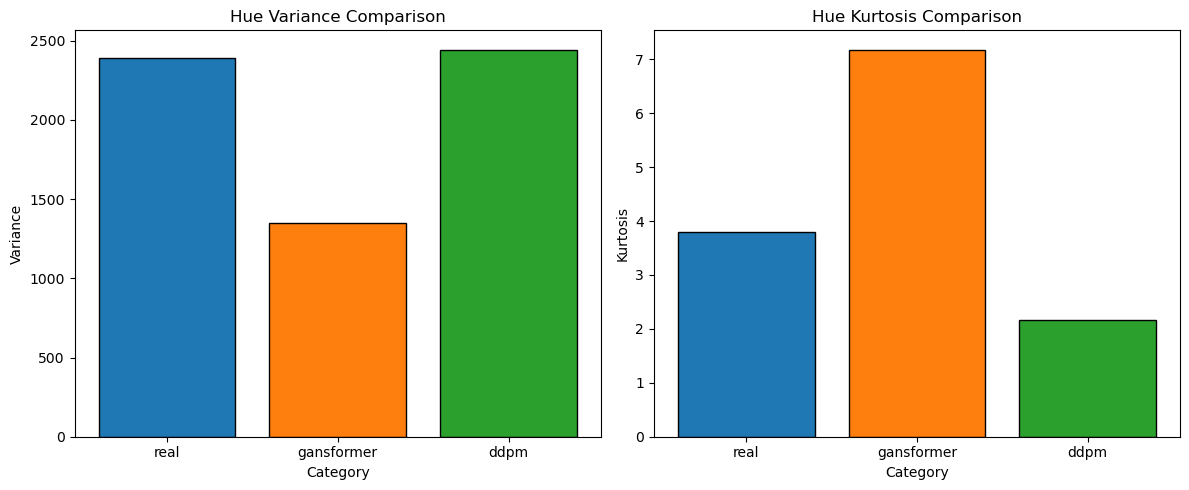

In [11]:
#!/usr/bin/env python3
"""
Plot Hue Variance and Kurtosis for Real vs. GAN vs. Diffusion Bedrooms
(with custom bar colors)
"""

import os
import glob
import numpy as np
from PIL import Image
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images(folder):
    imgs = []
    for path in glob.glob(os.path.join(folder, '*')):
        try:
            with Image.open(path) as im:
                imgs.append(np.array(im.convert('RGB')))
        except:
            pass
    return imgs

def hsv_h_moments(images):
    # stack all H channel pixels
    h_vals = []
    for img in images:
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        h_vals.append(hsv[...,0].flatten())
    h = np.concatenate(h_vals)
    return {
        'variance': np.var(h),
        'kurtosis': kurtosis(h, fisher=False)  # Pearson’s kurtosis
    }

def main():
    base_dir = 'data/BEST/bedroom_comparison'
    categories = ['real', 'gansformer', 'ddpm']

    # define a distinct color for each bar
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

    hue_var = []
    hue_kurt = []
    for cat in categories:
        imgs = load_images(os.path.join(base_dir, cat))
        moments = hsv_h_moments(imgs)
        hue_var.append(moments['variance'])
        hue_kurt.append(moments['kurtosis'])

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Hue Variance
    axes[0].bar(categories, hue_var, color=colors, edgecolor='black')
    axes[0].set_title('Hue Variance Comparison')
    axes[0].set_ylabel('Variance')
    axes[0].set_xlabel('Category')

    # Hue Kurtosis
    axes[1].bar(categories, hue_kurt, color=colors, edgecolor='black')
    axes[1].set_title('Hue Kurtosis Comparison')
    axes[1].set_ylabel('Kurtosis')
    axes[1].set_xlabel('Category')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

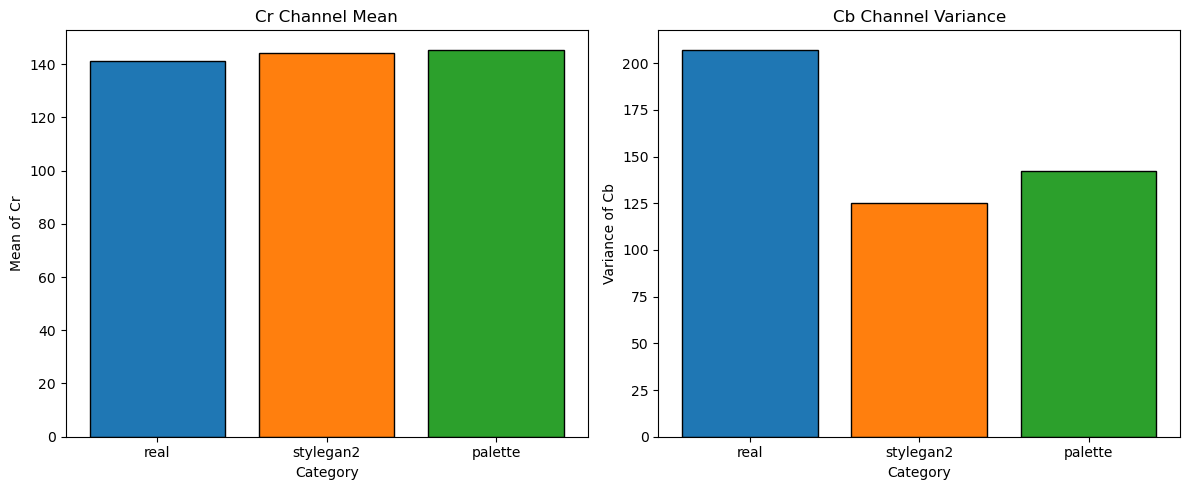

In [16]:
#!/usr/bin/env python3
"""
Plot YCbCr Cr Means and Cb Variances for Real vs. GAN vs. Diffusion Images
(gracefully handles empty folders)
"""

import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def load_images(folder):
    imgs = []
    for path in glob.glob(os.path.join(folder, '*')):
        try:
            with Image.open(path) as im:
                imgs.append(np.array(im.convert('RGB')))
        except Exception as e:
            print(f"Warning: could not load {path}: {e}")
    return imgs

def ycbcr_stats(images):
    """
    Returns {'Cr_mean': ..., 'Cb_var': ...} or None if no images.
    """
    if not images:
        return None

    cr_vals, cb_vals = [], []
    for img in images:
        ycb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        cr_vals.append(ycb[...,1].flatten())
        cb_vals.append(ycb[...,2].flatten())

    cr = np.concatenate(cr_vals)
    cb = np.concatenate(cb_vals)
    return {
        'Cr_mean': np.mean(cr),
        'Cb_var' : np.var(cb)
    }

def main():
    base_dir = 'data/BEST/face'  # adjust as needed
    categories = ['real', 'stylegan2', 'palette']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    cr_means = []
    cb_vars  = []
    valid_cats = []

    for cat in categories:
        folder = os.path.join(base_dir, cat)
        imgs   = load_images(folder)
        stats  = ycbcr_stats(imgs)
        if stats is None:
            print(f"Warning: no images found in {folder}, skipping.")
            continue

        valid_cats.append(cat)
        cr_means.append(stats['Cr_mean'])
        cb_vars.append(stats['Cb_var'])

    if not valid_cats:
        print("Error: no valid categories with images found – nothing to plot.")
        return

    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # Cr mean
    axes[0].bar(valid_cats, cr_means, color=colors[:len(valid_cats)], edgecolor='black')
    axes[0].set_title('Cr Channel Mean')
    axes[0].set_xlabel('Category')
    axes[0].set_ylabel('Mean of Cr')

    # Cb variance
    axes[1].bar(valid_cats, cb_vars, color=colors[:len(valid_cats)], edgecolor='black')
    axes[1].set_title('Cb Channel Variance')
    axes[1].set_xlabel('Category')
    axes[1].set_ylabel('Variance of Cb')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

## Face results:

Loaded 6000 images for category 'real'
Loaded 6000 images for category 'stylegan2'
Loaded 5999 images for category 'palette'

RGB Channel Moments by Category:
Category: real
  R: {'mean': 133.50690660833334, 'variance': 5134.029967965377, 'skewness': -0.14522948354489, 'kurtosis': -1.1276867684340162}
  G: {'mean': 109.24532605, 'variance': 4248.078005987524, 'skewness': 0.22656304283418224, 'kurtosis': -0.8737853009094612}
  B: {'mean': 97.79143279583333, 'variance': 4296.306957300551, 'skewness': 0.507398070548417, 'kurtosis': -0.6035659024382549}
Category: stylegan2
  R: {'mean': 141.62263036666667, 'variance': 4473.792275093174, 'skewness': -0.305954352610196, 'kurtosis': -0.999490250501307}
  G: {'mean': 111.5859153375, 'variance': 3411.1371225548028, 'skewness': 0.038014023622279916, 'kurtosis': -0.8167866304116473}
  B: {'mean': 97.39745035833333, 'variance': 3327.3536775709895, 'skewness': 0.34508900116595326, 'kurtosis': -0.5376102600243864}
Category: palette
  R: {'mean': 140

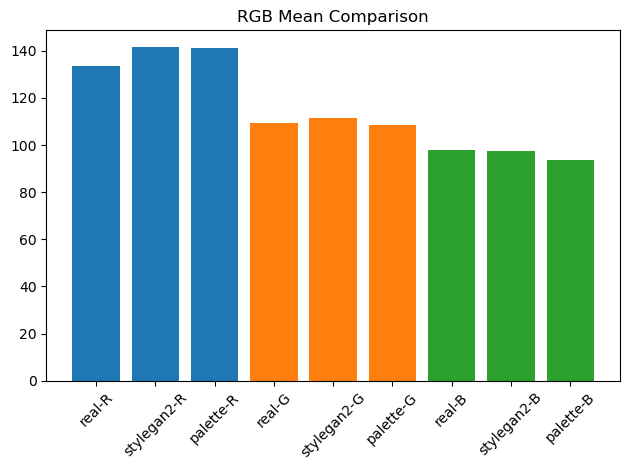

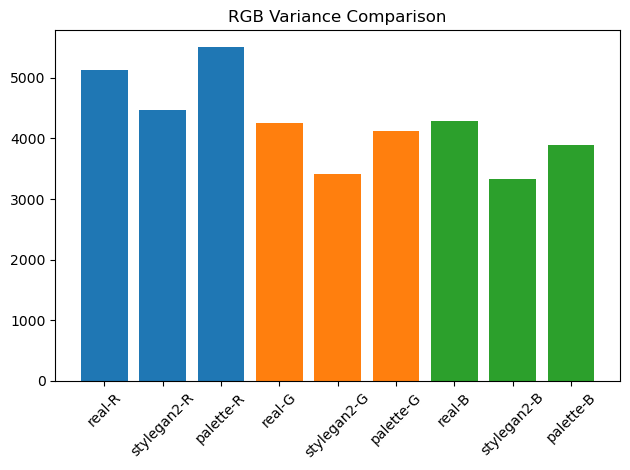

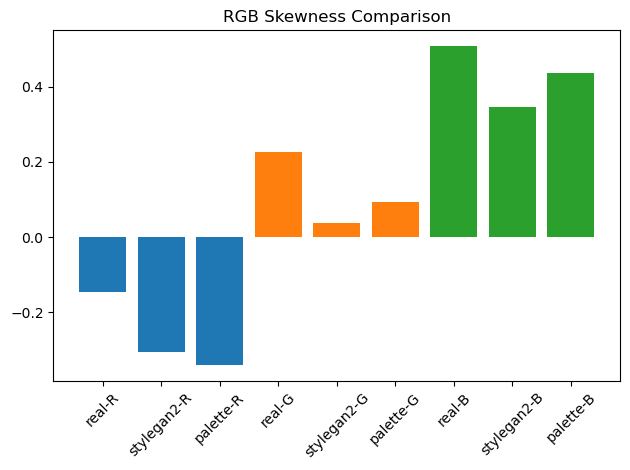

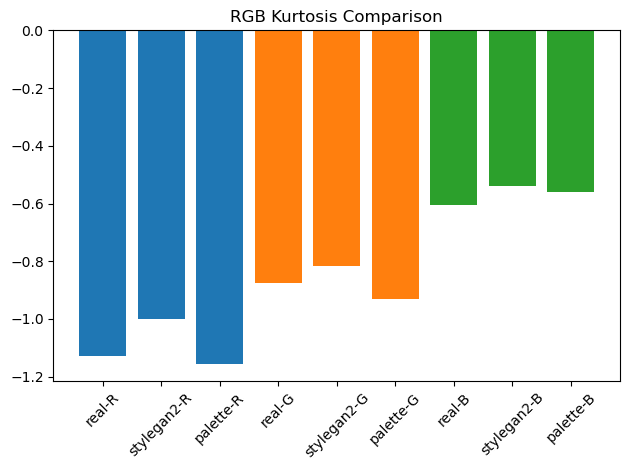

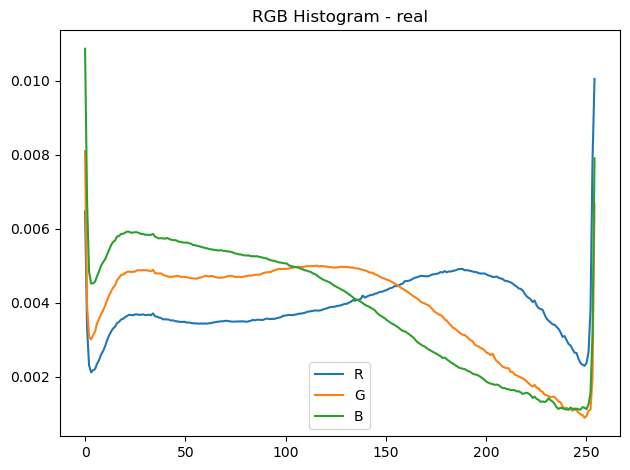

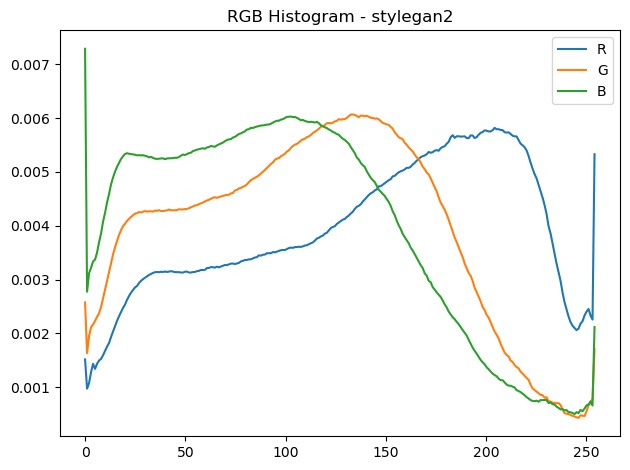

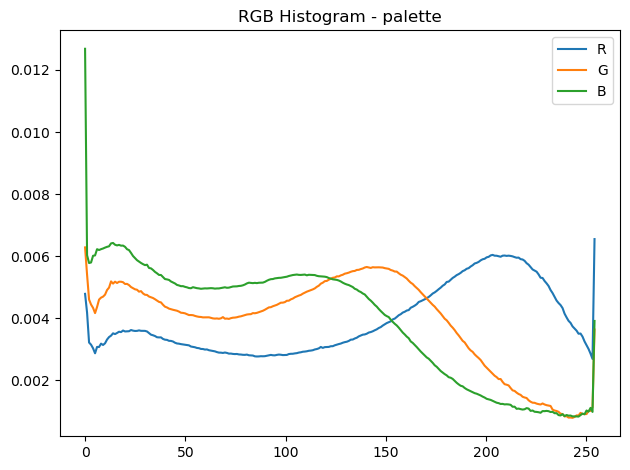


HSV Channel Moments by Category:
Category: real
  H: {'mean': 40.958190425, 'variance': 2799.755712951121, 'skewness': 1.4311563800648939, 'kurtosis': 0.6172984122923073}
  S: {'mean': 93.15120924583333, 'variance': 3512.5111351848277, 'skewness': 0.5696567108306825, 'kurtosis': -0.09358967475555025}
  V: {'mean': 138.9215047125, 'variance': 5015.843186010663, 'skewness': -0.19369477372764676, 'kurtosis': -1.0867961361459924}
Category: stylegan2
  H: {'mean': 27.568139445833335, 'variance': 1853.9038884825957, 'skewness': 2.3824640441014666, 'kurtosis': 4.4743083164913715}
  S: {'mean': 93.96019248333333, 'variance': 2569.8322997532787, 'skewness': 0.5367084433983792, 'kurtosis': 0.4816439779447341}
  V: {'mean': 144.0627799625, 'variance': 4392.095540580436, 'skewness': -0.32299547349711905, 'kurtosis': -0.971080969652395}
Category: palette
  H: {'mean': 29.82970967661277, 'variance': 2154.9388272601013, 'skewness': 2.159992312379343, 'kurtosis': 3.3006123542519}
  S: {'mean': 99.600

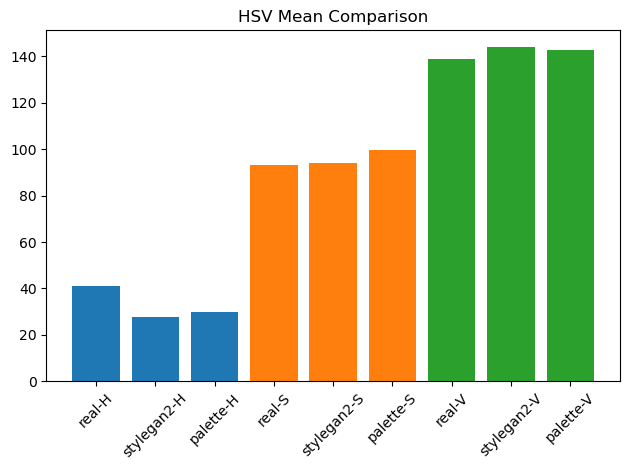

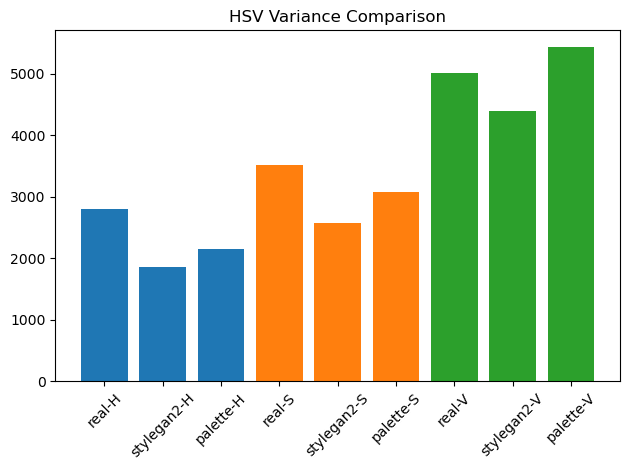

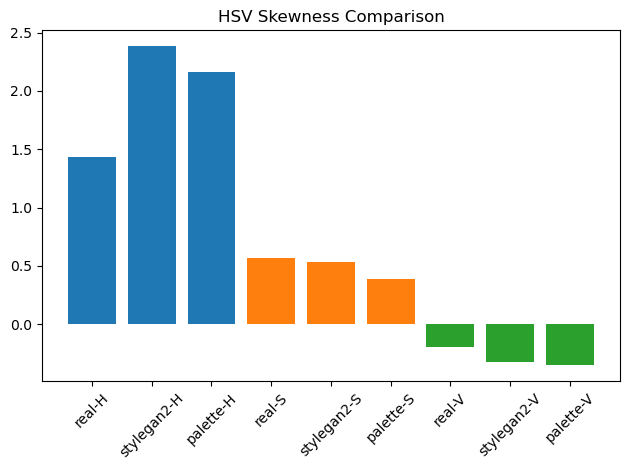

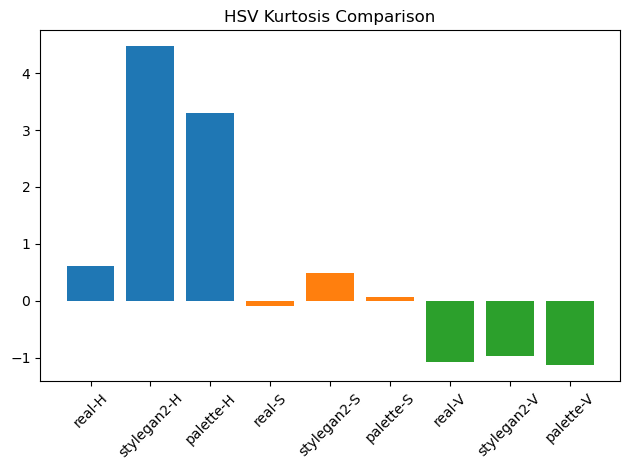


YCbCr Channel Moments by Category:
Category: real
  Y: {'mean': 115.19387000833333, 'variance': 4221.151724778232, 'skewness': 0.11329047028883873, 'kurtosis': -0.953592630907711}
  Cr: {'mean': 141.07656477083333, 'variance': 290.5368431983652, 'skewness': 0.26787900055475, 'kurtosis': 3.5249484924307097}
  Cb: {'mean': 118.182114225, 'variance': 207.27061410072045, 'skewness': 0.3205653816635411, 'kurtosis': 5.012438287797904}
Category: stylegan2
  Y: {'mean': 118.95649627083333, 'variance': 3527.4793798213955, 'skewness': -0.0823144322919207, 'kurtosis': -0.9084592609846625}
  Cr: {'mean': 144.19049360416668, 'variance': 193.48362892427073, 'skewness': -0.13761695036540816, 'kurtosis': 2.942264954926684}
  Cb: {'mean': 115.8290320875, 'variance': 124.94332306872862, 'skewness': 0.7142602557738976, 'kurtosis': 7.545083811154679}
Category: palette
  Y: {'mean': 116.61735446324387, 'variance': 4296.044627838288, 'skewness': -0.059879210422612406, 'kurtosis': -1.0469677516363536}
  Cr:

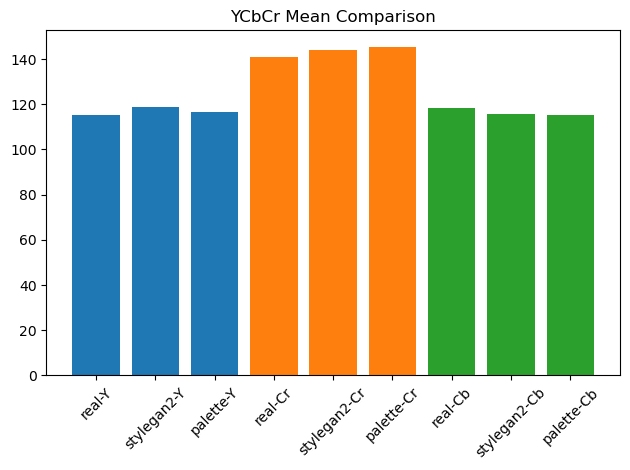

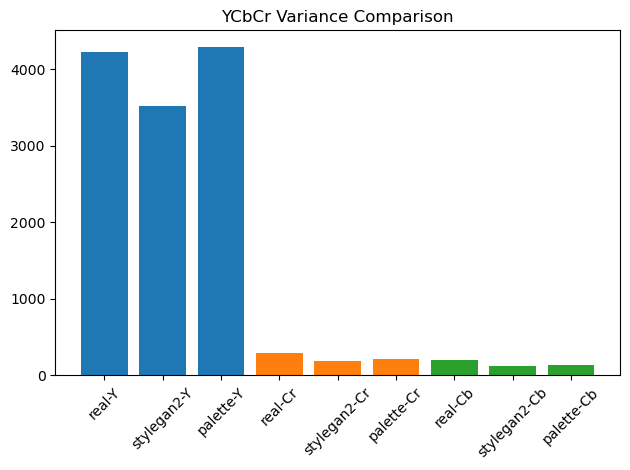

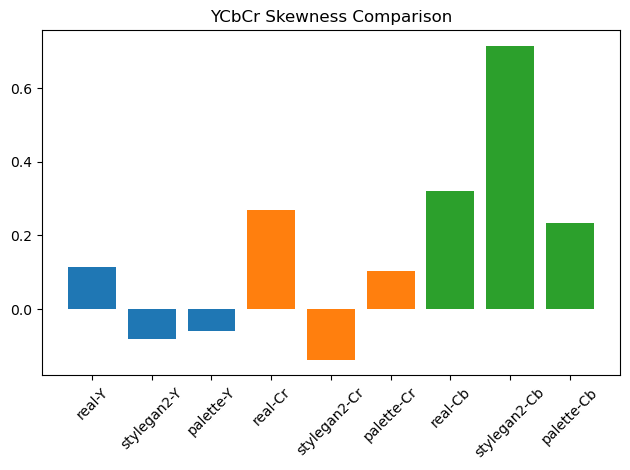

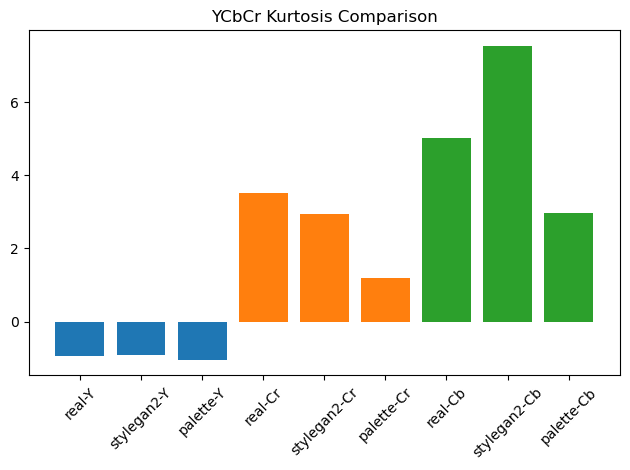

In [8]:
#!/usr/bin/env python3
"""
Color Distribution Analysis for Hierarchical Datasets

This script analyzes color distributions across three main categories
(`real`, `gan`, `diffusion`), each containing many subfolders of images.
It:
  1. Recursively loads all images under each category directory
  2. Computes RGB channel moments (mean, variance, skewness, kurtosis)
  3. Computes normalized RGB histograms
  4. Computes channel moments in HSV and YCbCr spaces
  5. Plots comparative bar charts and histograms across categories

Requirements:
    - Python 3.x
    - numpy
    - scipy
    - matplotlib
    - pillow
    - opencv-python

Usage:
    1. Arrange your data root:
         data/BEST/face/real/
         data/BEST/face/gan/
         data/BEST/face/diffusion/
       Each category folder may contain nested subfolders.
    2. Run:
         python color_distribution_analysis.py
"""
import os
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images_recursive(root_folder, exts=None):
    """
    Recursively walk root_folder and load all images into a list of arrays.
    """
    if exts is None:
        exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    images = []
    for dirpath, _, filenames in os.walk(root_folder):
        for fname in filenames:
            if os.path.splitext(fname.lower())[1] not in exts:
                continue
            path = os.path.join(dirpath, fname)
            try:
                with Image.open(path) as img:
                    images.append(np.array(img.convert('RGB')))
            except Exception as e:
                print(f"Warning: failed to load {path}: {e}")
    return images


def compute_rgb_moments(images):
    pixels = np.concatenate([img.reshape(-1,3) for img in images], axis=0)
    moments = {}
    for i, ch in enumerate(['R','G','B']):
        data = pixels[:, i]
        moments[ch] = {
            'mean': np.mean(data),
            'variance': np.var(data),
            'skewness': skew(data),
            'kurtosis': kurtosis(data)
        }
    return moments


def compute_rgb_histograms(images, bins=256, normalize=True):
    hist_sum = {ch: np.zeros(bins) for ch in ['R','G','B']}
    for img in images:
        for i, ch in enumerate(['R','G','B']):
            h, edges = np.histogram(img[...,i].flatten(), bins=bins, range=(0,255))
            hist_sum[ch] += h
    if normalize:
        total = sum(hist_sum.values())[0] if False else None
        for ch in hist_sum:
            hist_sum[ch] = hist_sum[ch] / hist_sum[ch].sum()
    return hist_sum, edges


def convert_and_compute_moments(images, space='HSV'):
    if space.upper() == 'HSV':
        flag = cv2.COLOR_RGB2HSV
        names = ['H','S','V']
    elif space.upper() == 'YCBCR':
        flag = cv2.COLOR_RGB2YCrCb
        names = ['Y','Cr','Cb']
    else:
        raise ValueError(f"Unknown color space: {space}")
    conv = [cv2.cvtColor(img, flag) for img in images]
    pix = np.concatenate([c.reshape(-1,3) for c in conv], axis=0)
    moments = {}
    for i, name in enumerate(names):
        d = pix[:, i]
        moments[name] = {
            'mean': np.mean(d),
            'variance': np.var(d),
            'skewness': skew(d),
            'kurtosis': kurtosis(d)
        }
    return moments


def plot_comparison(moments_dict, title_prefix, channel_names):
    """Plot bar charts for each statistical moment across categories."""
    categories = list(moments_dict.keys())
    stats = ['mean', 'variance', 'skewness', 'kurtosis']
    for stat in stats:
        plt.figure()
        for ch in channel_names:
            values = [moments_dict[cat][ch][stat] for cat in categories]
            plt.bar([f"{cat}-{ch}" for cat in categories], values)
        plt.xticks(rotation=45)
        plt.title(f"{title_prefix} {stat.capitalize()} Comparison")
        plt.tight_layout()
        plt.show()


def plot_histograms(per_cat_hists, bin_edges):
    """Plot normalized RGB histograms for each category."""
    for cat, hist_sum in per_cat_hists.items():
        plt.figure()
        for ch in ['R','G','B']:
            plt.plot(bin_edges[:-1], hist_sum[ch], label=ch)
        plt.title(f"RGB Histogram - {cat}")
        plt.legend()
        plt.tight_layout()
        plt.show()


def main():
    base_dir = 'data/BEST/face/'  
    categories = ['real', 'stylegan2', 'palette']

    # Load images per category
    datasets = {}
    for cat in categories:
        path = os.path.join(base_dir, cat)
        imgs = load_images_recursive(path)
        print(f"Loaded {len(imgs)} images for category '{cat}'")
        datasets[cat] = imgs

    # RGB moments
    rgb_moments = {cat: compute_rgb_moments(imgs) for cat, imgs in datasets.items()}
    print("\nRGB Channel Moments by Category:")
    for cat, mom in rgb_moments.items():
        print(f"Category: {cat}")
        for ch, stats in mom.items(): print(f"  {ch}: {stats}")
    plot_comparison(rgb_moments, "RGB", ['R','G','B'])

    # RGB histograms
    per_cat_hists = {}
    for cat, imgs in datasets.items():
        h, edges = compute_rgb_histograms(imgs)
        per_cat_hists[cat] = h
    plot_histograms(per_cat_hists, edges)

    # HSV and YCbCr moments & plots
    for space, ch_names in [('HSV', ['H','S','V']), ('YCbCr', ['Y','Cr','Cb'])]:
        alt_mom = {cat: convert_and_compute_moments(imgs, space) for cat, imgs in datasets.items()}
        print(f"\n{space} Channel Moments by Category:")
        for cat, mom in alt_mom.items():
            print(f"Category: {cat}")
            for ch, stats in mom.items(): print(f"  {ch}: {stats}")
        plot_comparison(alt_mom, space, ch_names)

if __name__ == '__main__':
    main()

Loaded 10000 images for category 'real_imagenet'
Loaded 10000 images for category 'big_gan'
Loaded 10000 images for category 'vq_diffusion'

RGB Channel Moments by Category:
Category: real_imagenet
  R: {'mean': 89.52207061, 'variance': 6634.777449778213, 'skewness': 0.4185843029022787, 'kurtosis': -1.1093661597123672}
  G: {'mean': 85.648849985, 'variance': 6208.978625941858, 'skewness': 0.47661412379079104, 'kurtosis': -0.9900673479175963}
  B: {'mean': 75.7701211525, 'variance': 5936.803675062871, 'skewness': 0.7509018083412408, 'kurtosis': -0.6101601844951743}
Category: big_gan
  R: {'mean': 120.8621561675, 'variance': 4064.5759452553666, 'skewness': 0.09981552724184196, 'kurtosis': -0.7934236733111106}
  G: {'mean': 115.2164107175, 'variance': 3820.8507177888496, 'skewness': 0.19756677805582307, 'kurtosis': -0.666966873271658}
  B: {'mean': 101.5192135825, 'variance': 4433.520346953235, 'skewness': 0.5073085338549758, 'kurtosis': -0.6254464662793024}
Category: vq_diffusion
  R: {'

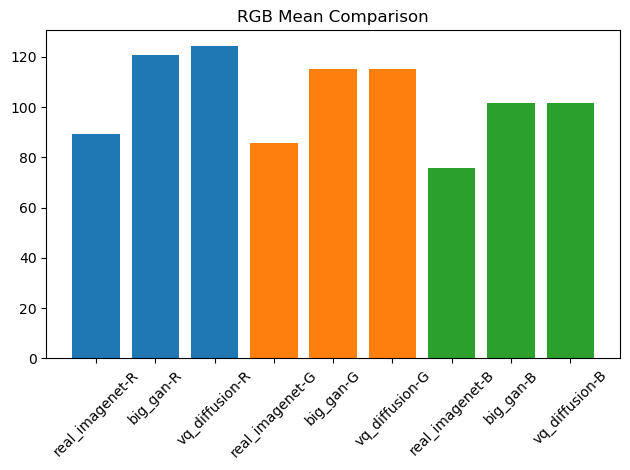

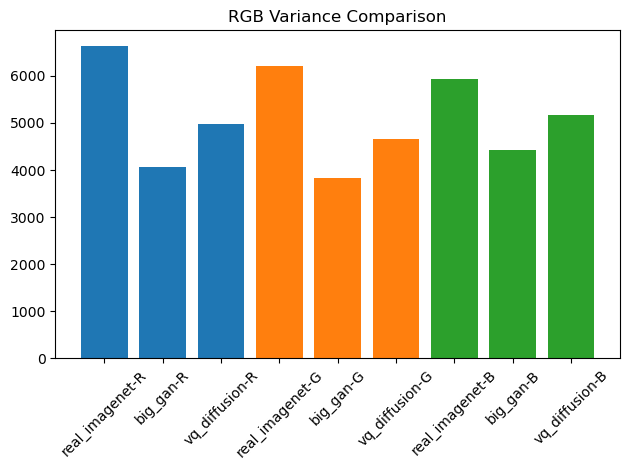

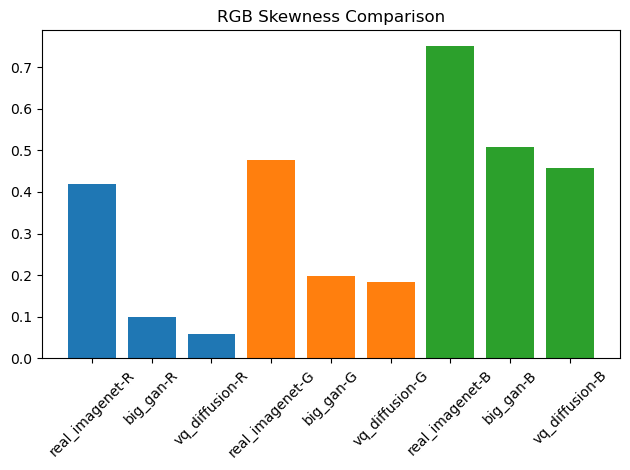

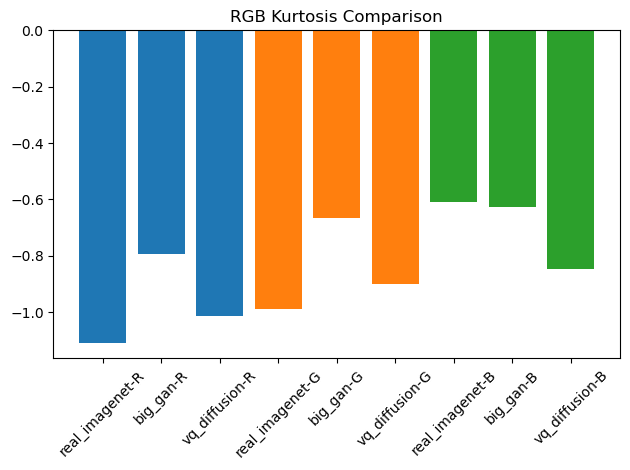

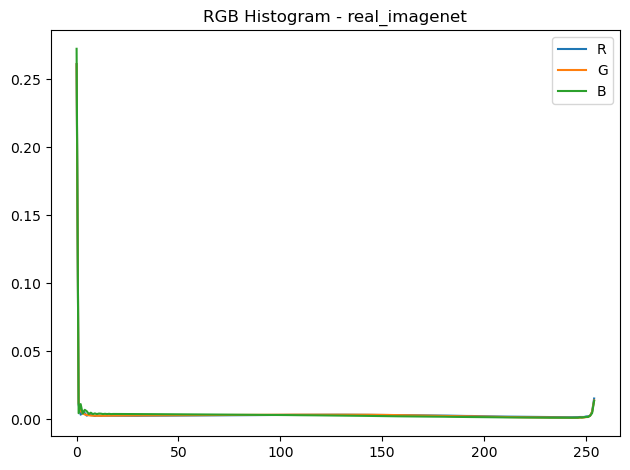

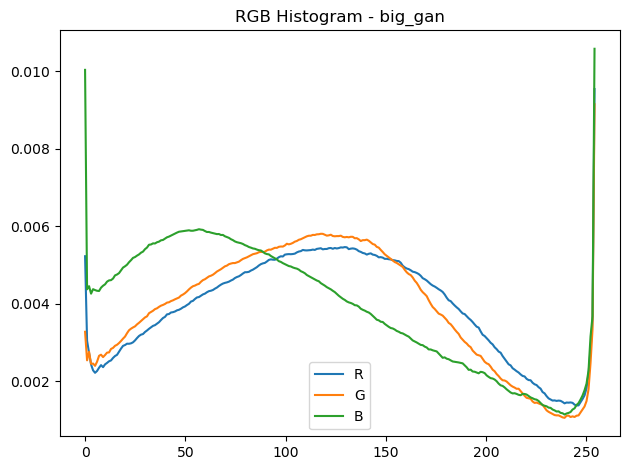

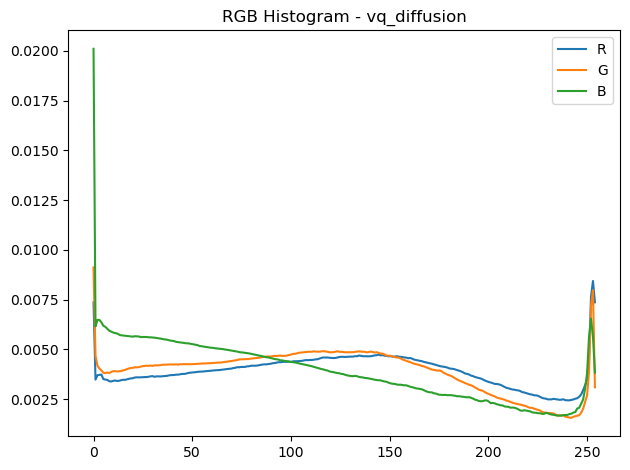


HSV Channel Moments by Category:
Category: real_imagenet
  H: {'mean': 39.7251038325, 'variance': 2211.666615539667, 'skewness': 1.2180384274924914, 'kurtosis': 0.4406172297892068}
  S: {'mean': 70.4043212325, 'variance': 6231.795688413369, 'skewness': 1.0438417340292256, 'kurtosis': -0.0524064273953484}
  V: {'mean': 97.2325385525, 'variance': 7065.529286324289, 'skewness': 0.28434556353748275, 'kurtosis': -1.2519168799638345}
Category: big_gan
  H: {'mean': 49.4534958175, 'variance': 2228.2021055259884, 'skewness': 1.0551958640131174, 'kurtosis': -0.027405808497220185}
  S: {'mean': 77.704110825, 'variance': 4189.53165188113, 'skewness': 0.88521893457343, 'kurtosis': 0.010573565771164972}
  V: {'mean': 130.5679929675, 'variance': 4040.4061760763343, 'skewness': -0.012543637635081312, 'kurtosis': -0.7958058681994911}
Category: vq_diffusion
  H: {'mean': 57.809834085, 'variance': 2895.678557999772, 'skewness': 0.7756060705520491, 'kurtosis': -0.7663985570622671}
  S: {'mean': 90.11436

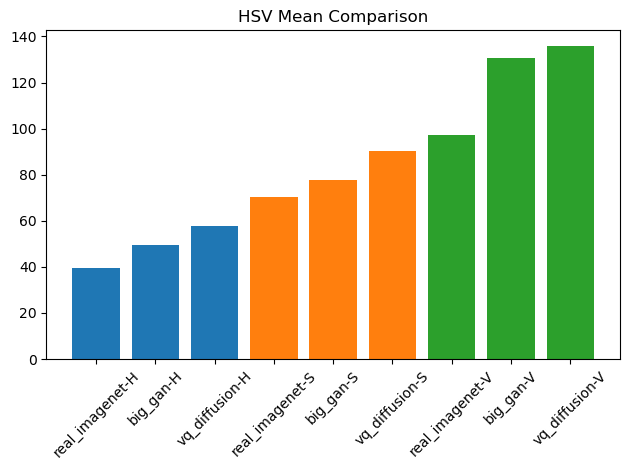

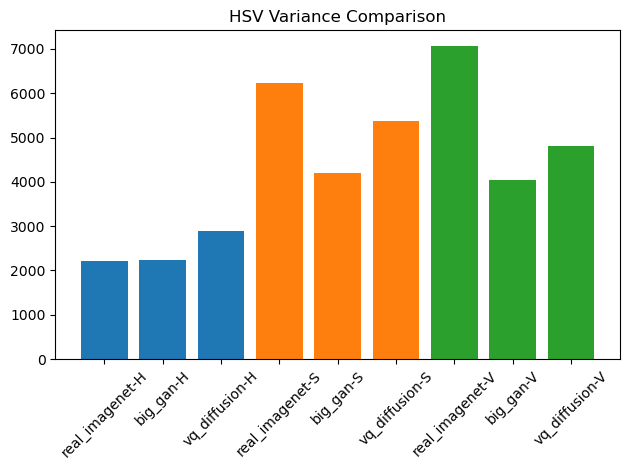

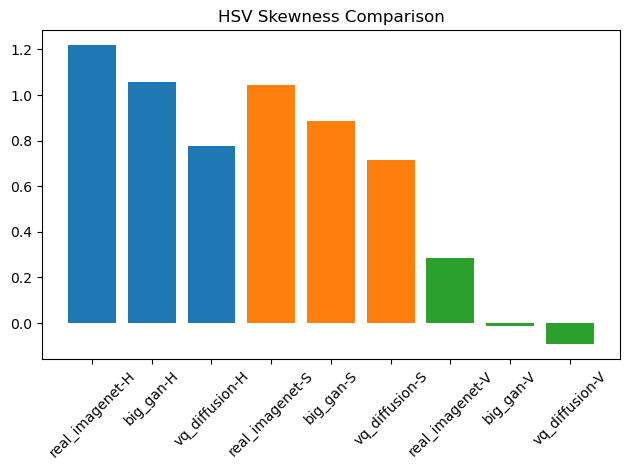

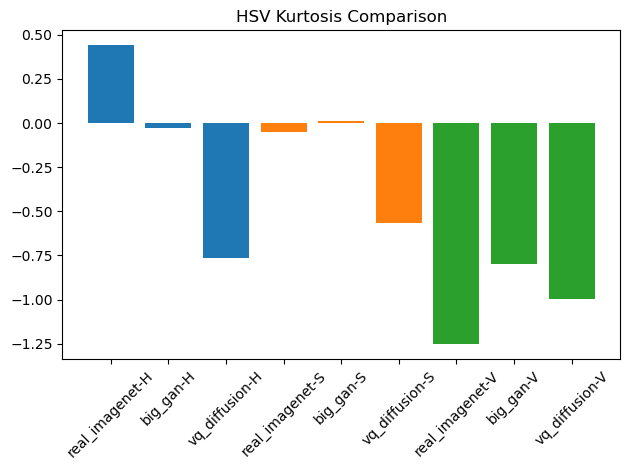


YCbCr Channel Moments by Category:
Category: real_imagenet
  Y: {'mean': 85.6817501975, 'variance': 6068.414943000741, 'skewness': 0.4670069929440109, 'kurtosis': -0.9733061928240669}
  Cr: {'mean': 130.73988167, 'variance': 200.04540190439485, 'skewness': 1.2111809928976656, 'kurtosis': 10.065268502596664}
  Cb: {'mean': 122.400264055, 'variance': 225.8210103612729, 'skewness': -0.9583303612601429, 'kurtosis': 5.951082782429886}
Category: big_gan
  Y: {'mean': 115.34421578, 'variance': 3673.4999669367744, 'skewness': 0.2213601041273515, 'kurtosis': -0.6082544719122298}
  Cr: {'mean': 131.94012026, 'variance': 247.61521126173596, 'skewness': 0.45791788299986436, 'kurtosis': 8.564205953835582}
  Cb: {'mean': 120.195855305, 'variance': 271.9031712545001, 'skewness': -0.19639357129841814, 'kurtosis': 4.671500410088282}
Category: vq_diffusion
  Y: {'mean': 116.398727995, 'variance': 4367.469696676003, 'skewness': 0.1988497179280034, 'kurtosis': -0.8318884259052752}
  Cr: {'mean': 133.7078

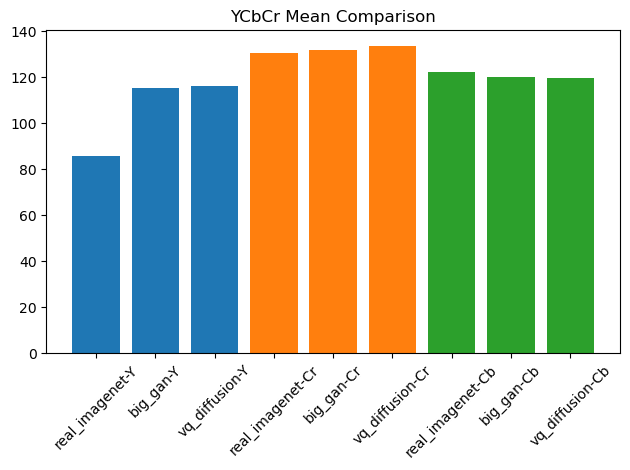

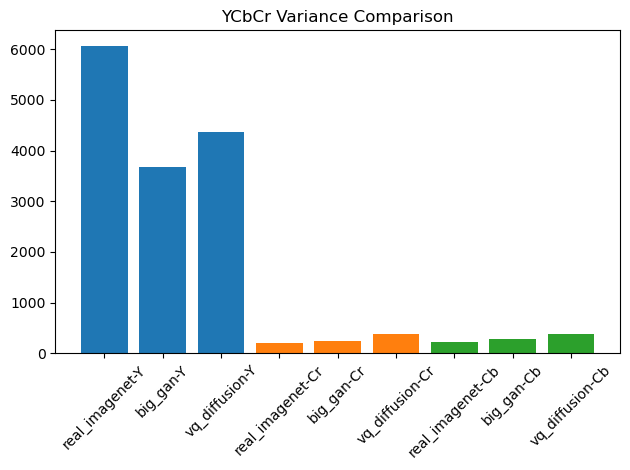

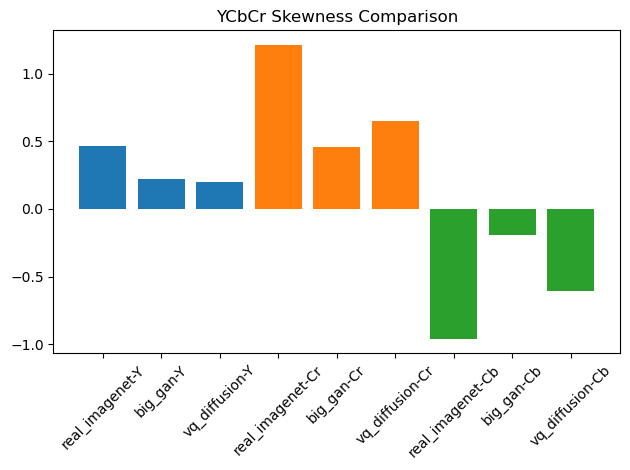

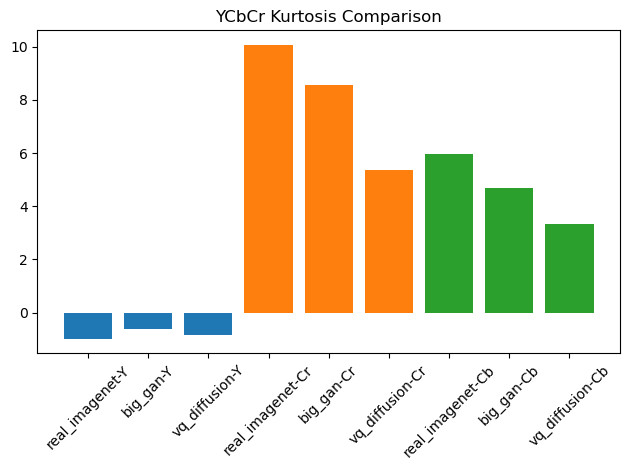

In [5]:
#!/usr/bin/env python3
"""
Color Distribution Analysis for Hierarchical Datasets

This script analyzes color distributions across three main categories
(`real`, `gan`, `diffusion`), each containing many subfolders of images.
It:
  1. Recursively loads all images under each category directory
  2. Computes RGB channel moments (mean, variance, skewness, kurtosis)
  3. Computes normalized RGB histograms
  4. Computes channel moments in HSV and YCbCr spaces
  5. Plots comparative bar charts and histograms across categories

Requirements:
    - Python 3.x
    - numpy
    - scipy
    - matplotlib
    - pillow
    - opencv-python

Usage:
    1. Arrange your data root:
         data/BEST/face/real/
         data/BEST/face/gan/
         data/BEST/face/diffusion/
       Each category folder may contain nested subfolders.
    2. Run:
         python color_distribution_analysis.py
"""
import os
import numpy as np
from PIL import Image
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import cv2

def load_images_recursive(root_folder, exts=None):
    """
    Recursively walk root_folder and load all images into a list of arrays.
    """
    if exts is None:
        exts = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    images = []
    for dirpath, _, filenames in os.walk(root_folder):
        for fname in filenames:
            if os.path.splitext(fname.lower())[1] not in exts:
                continue
            path = os.path.join(dirpath, fname)
            try:
                with Image.open(path) as img:
                    images.append(np.array(img.convert('RGB')))
            except Exception as e:
                print(f"Warning: failed to load {path}: {e}")
    return images


def compute_rgb_moments(images):
    pixels = np.concatenate([img.reshape(-1,3) for img in images], axis=0)
    moments = {}
    for i, ch in enumerate(['R','G','B']):
        data = pixels[:, i]
        moments[ch] = {
            'mean': np.mean(data),
            'variance': np.var(data),
            'skewness': skew(data),
            'kurtosis': kurtosis(data)
        }
    return moments


def compute_rgb_histograms(images, bins=256, normalize=True):
    hist_sum = {ch: np.zeros(bins) for ch in ['R','G','B']}
    for img in images:
        for i, ch in enumerate(['R','G','B']):
            h, edges = np.histogram(img[...,i].flatten(), bins=bins, range=(0,255))
            hist_sum[ch] += h
    if normalize:
        total = sum(hist_sum.values())[0] if False else None
        for ch in hist_sum:
            hist_sum[ch] = hist_sum[ch] / hist_sum[ch].sum()
    return hist_sum, edges


def convert_and_compute_moments(images, space='HSV'):
    if space.upper() == 'HSV':
        flag = cv2.COLOR_RGB2HSV
        names = ['H','S','V']
    elif space.upper() == 'YCBCR':
        flag = cv2.COLOR_RGB2YCrCb
        names = ['Y','Cr','Cb']
    else:
        raise ValueError(f"Unknown color space: {space}")
    conv = [cv2.cvtColor(img, flag) for img in images]
    pix = np.concatenate([c.reshape(-1,3) for c in conv], axis=0)
    moments = {}
    for i, name in enumerate(names):
        d = pix[:, i]
        moments[name] = {
            'mean': np.mean(d),
            'variance': np.var(d),
            'skewness': skew(d),
            'kurtosis': kurtosis(d)
        }
    return moments


def plot_comparison(moments_dict, title_prefix, channel_names):
    """Plot bar charts for each statistical moment across categories."""
    categories = list(moments_dict.keys())
    stats = ['mean', 'variance', 'skewness', 'kurtosis']
    for stat in stats:
        plt.figure()
        for ch in channel_names:
            values = [moments_dict[cat][ch][stat] for cat in categories]
            plt.bar([f"{cat}-{ch}" for cat in categories], values)
        plt.xticks(rotation=45)
        plt.title(f"{title_prefix} {stat.capitalize()} Comparison")
        plt.tight_layout()
        plt.show()


def plot_histograms(per_cat_hists, bin_edges):
    """Plot normalized RGB histograms for each category."""
    for cat, hist_sum in per_cat_hists.items():
        plt.figure()
        for ch in ['R','G','B']:
            plt.plot(bin_edges[:-1], hist_sum[ch], label=ch)
        plt.title(f"RGB Histogram - {cat}")
        plt.legend()
        plt.tight_layout()
        plt.show()


def main():
    base_dir = 'data/BEST/everything/'
    categories = ['real_imagenet', 'big_gan', 'vq_diffusion']

    # Load images per category
    datasets = {}
    for cat in categories:
        path = os.path.join(base_dir, cat)
        imgs = load_images_recursive(path)
        print(f"Loaded {len(imgs)} images for category '{cat}'")
        datasets[cat] = imgs

    # RGB moments
    rgb_moments = {cat: compute_rgb_moments(imgs) for cat, imgs in datasets.items()}
    print("\nRGB Channel Moments by Category:")
    for cat, mom in rgb_moments.items():
        print(f"Category: {cat}")
        for ch, stats in mom.items(): print(f"  {ch}: {stats}")
    plot_comparison(rgb_moments, "RGB", ['R','G','B'])

    # RGB histograms
    per_cat_hists = {}
    for cat, imgs in datasets.items():
        h, edges = compute_rgb_histograms(imgs)
        per_cat_hists[cat] = h
    plot_histograms(per_cat_hists, edges)

    # HSV and YCbCr moments & plots
    for space, ch_names in [('HSV', ['H','S','V']), ('YCbCr', ['Y','Cr','Cb'])]:
        alt_mom = {cat: convert_and_compute_moments(imgs, space) for cat, imgs in datasets.items()}
        print(f"\n{space} Channel Moments by Category:")
        for cat, mom in alt_mom.items():
            print(f"Category: {cat}")
            for ch, stats in mom.items(): print(f"  {ch}: {stats}")
        plot_comparison(alt_mom, space, ch_names)

if __name__ == '__main__':
    main()